In [ ]:
#### PACKAGE IMPORTS ####

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense

#### Load and preprocess the data

In [ ]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
def scale_mnist_data(train_images, test_images):

    train_images=train_images/255
    test_images=test_images/255

    return (train_images,test_images)

In [ ]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

In [ ]:
def get_model(input_shape):

    model=Sequential([
        Conv2D(8,(3,3),padding='same',activation='relu',input_shape=input_shape),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])

    return model

In [ ]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

#### Compile the model


In [ ]:
def compile_model(model):

    model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',
                  metrics='accuracy')

In [ ]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

In [ ]:
def train_model(model, scaled_train_images, train_labels):

    history=model.fit(scaled_train_images, train_labels,epochs=5)

    return history

In [ ]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0188 - accuracy: 0.9938
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0166 - accuracy: 0.9947
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9955
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0125 - accuracy: 0.9956


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

In [ ]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)
print(frame)

       loss  accuracy
0  0.024024  0.992067
1  0.018776  0.993767
2  0.016613  0.994650
3  0.013100  0.995450
4  0.012503  0.995583


[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

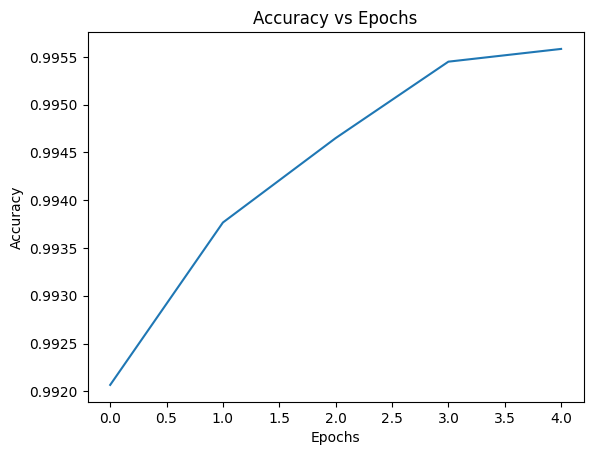

In [ ]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

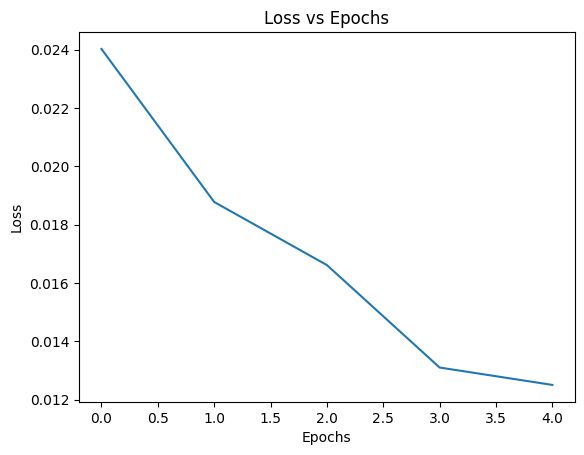

In [ ]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model


In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):

    test_result=model.evaluate(scaled_test_images,test_labels)

    return test_result

In [ ]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0683 - accuracy: 0.9816
Test loss: 0.06825507432222366
Test accuracy: 0.9815999865531921


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each.

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

1/1 [==============================] - 0s 104ms/step


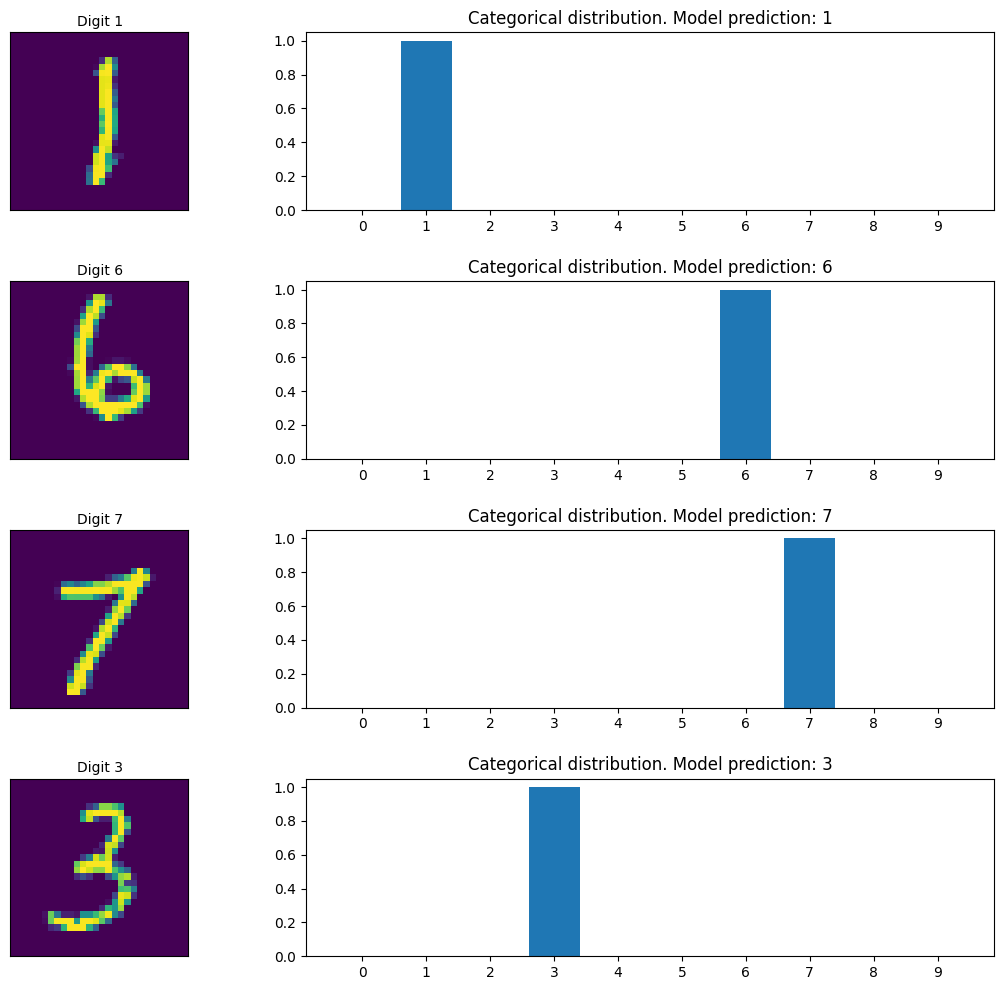

In [ ]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")

plt.show()